<a href="https://colab.research.google.com/github/therealshai/Pytorch-notebooks/blob/main/03_pytorch_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision -art of teaching a computer to see.

Typical inputs and outputs of CV model:

INPUT: images wih 3 channels : width, height and color channels(RGB)

-> CONVERT IT INTO TENSORs

-> goes into ML model (CNN)

-> OUTPUT: predicted probabilities

OUPUT: predcited class the image belongs to


`shape= [batch_size, width, height,colour_channels]` -> **NHWC** => *colour channels last*

`shape= [batch_size,colour_channels  width, height,]` -> **NCHW** => *colour chanels first*


# What is a Convolutional Neural Network (CNN)?

+ A convolutional neural network is a specific kind of neural network with multiple layers. It processes data that has a grid-like arrangement then extracts important features.


+ CNNs use convolutions to handle the math behind the scenes. A convolution is used instead of matrix multiplication in at least one layer of the CNN

+ `Convolutions` :a *mathematical operation* performed on two functions that yields a function that is a combination of the two original functions.

  The convolution operation follows the properties of multiplication:

  1.   Commutative: `fg = gf`
  2.  Associative: `(fg)h = f(gh)`
  3. Distributive: `h(f+g) = hf + hg`


#Typical Architecture of a CNN

Hyperparameters or layer type


1.  **Input images**
2.   **Input layer**  -> takes images and preprocess it `input_shape`
3. **Convolution Layer** -> Extracts and learns the most important features from target images `torch.nn.ConvXd()`
4. **hidden activation** ->Adds non-linearity to learned features `torch.nn.ReLU()`
5.**Pooling layer** -> Reduces the dimensionality of learned image features Max:`torch.nn.MaxPool2d()` Avg: `torch.nn.AvgPool2d()`
6. **Output/linear layer** -> `torch.nn.Linear(out_features=[no_of_classes])`
7. **ouput activation** -> converts logits to predictions prob `torch.sigmoid()` or `torch.softmax()`



---


CV libraries:
`torchvision`

`torchvision.datasets`

`torchvision.models` => Transfer learning

`torchvision.transforms`

`torch.utils.data.Dataset`

`torch.utils.data.DataLoader`

---






In [53]:
import torch
from torch import nn

In [54]:
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision import datasets

In [55]:
import matplotlib.pyplot as plt

In [56]:
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## 1. Get Dataset = FashionMNIST

In [57]:
# datasets-MNIST
train_data=datasets.FashionMNIST(
    root="data", # where to download data
    train=True, # do we need training dataset
    download=True,  # do we want to download it ?
    transform=torchvision.transforms.ToTensor(),
    target_transform=None  # do we need the labels?
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)



`torchvision.transforms.ToTensor()` : coverts the image (H,W,C) in the range [0,255] to torch.floatTensor of shape (C,H,W) in the range of 0 to 1

In [58]:
len(train_data), len(test_data)

(60000, 10000)

In [59]:
image , label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [60]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [61]:
train_data[0][1]

9

In [62]:
class_index= train_data.class_to_idx
class_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [63]:
train_data.targets  #all labels

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check in and out shape

In [64]:
# shapes of our image
print(f"Image shape: {image.shape}") # 1- color channels since the dataset is in grayscale
print(f"Label shape: {class_names[label]}")

Image shape: torch.Size([1, 28, 28])
Label shape: Ankle boot


### 1.2 Visualize our data

In [65]:
image,label=train_data[0]
image.shape

torch.Size([1, 28, 28])

Invalid shape (1, 28, 28) for image data


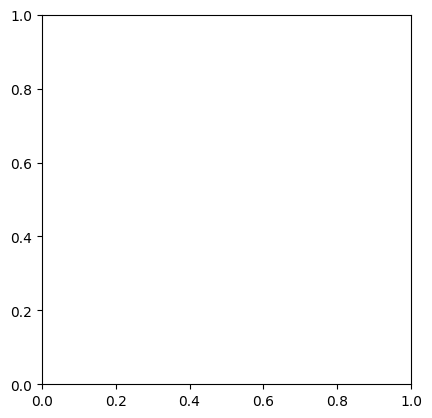

In [66]:
try:
  plt.imshow(image) #common error: shape error
except Exception as e:
  print(e)

Text(0.5, 1.0, 'Ankle boot')

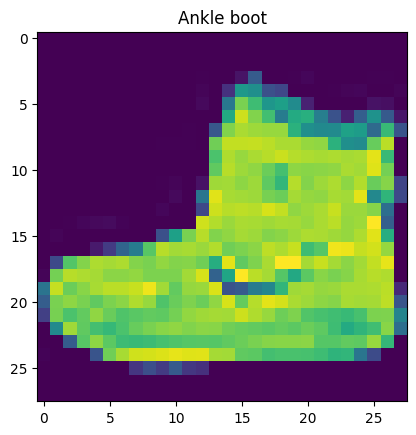

In [67]:
plt.imshow(image.squeeze()) #removed 1 dim
plt.title(class_names[label])

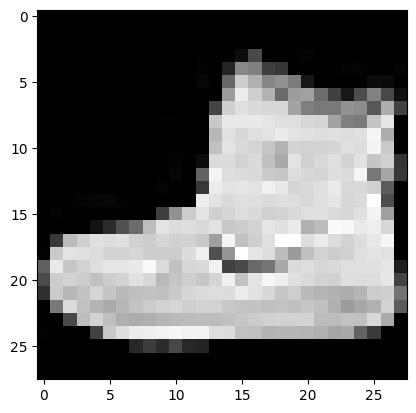

In [68]:
plt.imshow(image.squeeze(),cmap="gray")

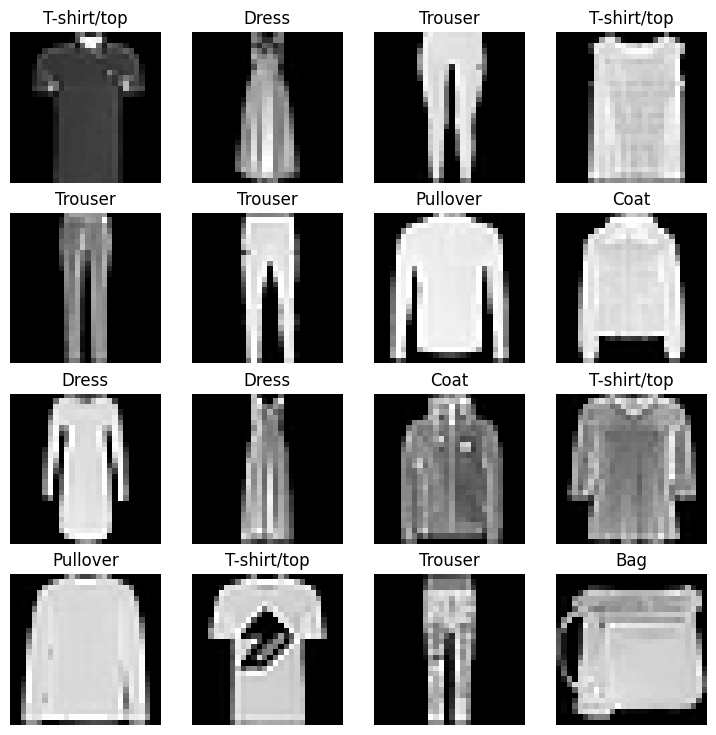

In [69]:
#plot more images
#torch.manual_seed=42

fig=plt.figure(figsize=(9,9))
rows,cols=4,4

for i in range(1, rows*cols+1):
  random_int=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_int]

  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader
turns dataset into a python iterable + turn data into batches

`torch.utils.data.DataLoader` and `torch.utils.data.Dataset`. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset

In [71]:
BATCH_SIZE=32

In [74]:
train_dataloader= DataLoader(train_data,batch_size=32, shuffle=True)
test_dataloader= DataLoader(test_data,batch_size=32, shuffle=False)

In [75]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d44dceff0d0>, <torch.utils.data.dataloader.DataLoader object at 0x7d44dc6ba610>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


`iter(train_dataloader)` creates an iterator from the train_dataloader.

`next()` gets the next item from the iterator, which in this case is a batch of images and labels. These are then unpacked into the` train_features_batch `and `train_labels_batch` variables.

So, `train_features_batch` will contain a batch of `images`, and `train_labels_batch `will contain the corresponding `labels` for those images.

In [76]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


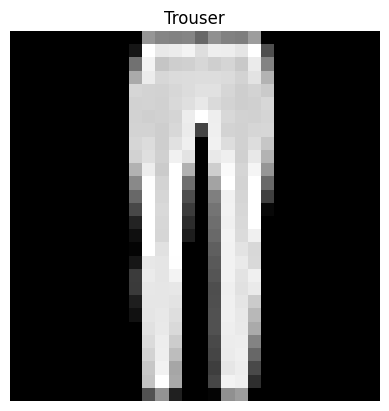

In [78]:
torch.manual_seed=42
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")